In [1]:
# import os

# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from glob import glob
# import seaborn as sns
# from PIL import Image
# np.random.seed(21) 
# from sklearn.preprocessing import StandardScaler 
# from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# from sklearn.metrics import accuracy_score
# import itertools

# import keras
# from keras.utils import to_categorical # used for converting labels to one-hot-encoding
# from keras.models import Sequential, Model
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
# from keras.optimizers import Adam, RMSprop
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.applications.resnet50 import ResNet50




2024-07-08 11:46:05.272991: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 11:46:05.273107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 11:46:05.407013: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ModuleNotFoundError: No module named 'keras.wrappers'

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os
from keras.optimizers import Adam, RMSprop
np.random.seed(21) 
import matplotlib.pyplot as plt

from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization , Dropout
from keras.applications.resnet50 import ResNet50
# from keras.callbacks import ReduceLROnPlateau
# from keras.preprocessing.image import ImageDataGenerator #error
from keras.applications.resnet50 import ResNet50

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


2024-07-08 15:29:41.493070: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 15:29:41.493186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 15:29:41.628795: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [36]:
folder_benign_train = '/kaggle/input/skin-cancer-malignant-vs-benign/train/benign'
folder_malignant_train = '/kaggle/input/skin-cancer-malignant-vs-benign/train/malignant'

folder_benign_test = '/kaggle/input/skin-cancer-malignant-vs-benign/test/benign'
folder_malignant_test = '/kaggle/input/skin-cancer-malignant-vs-benign/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

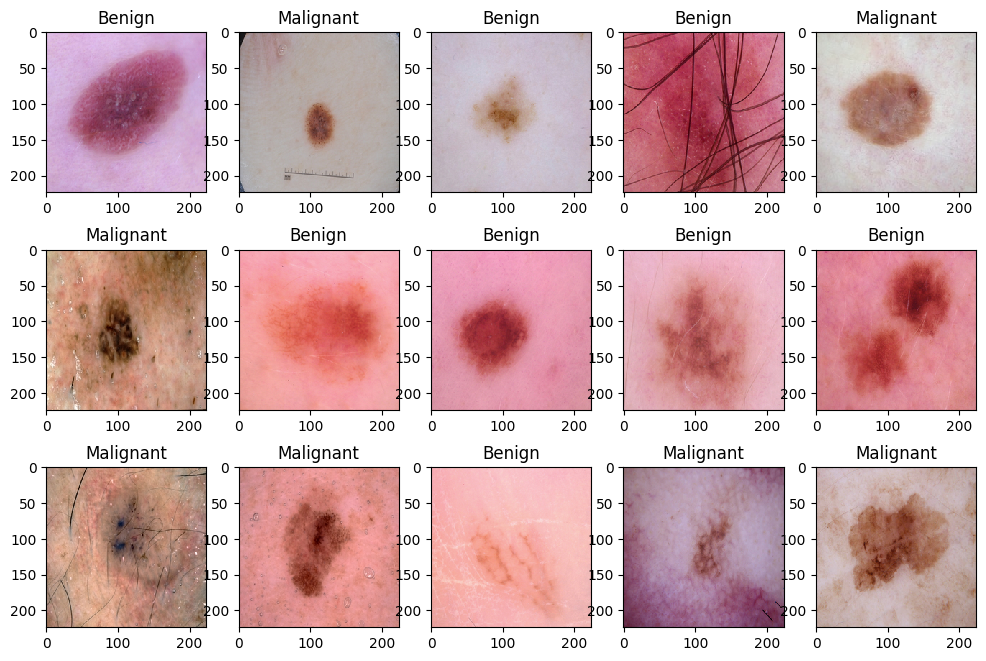

In [3]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [4]:
y_train = to_categorical(y_train, num_classes= 2)
y_test = to_categorical(y_test, num_classes= 2)

In [37]:
X_train = X_train/255.
X_test = X_test/255.

In [38]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add fully connected layers
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

# Add output layer
output = Dense(2, activation='softmax')(x)

# Combine base model and the new fully connected layers
model = Model(inputs=base_model.input, outputs=output)

# Print the model summary to check the structure
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 134,268,738 (512.19 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [50]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=30, batch_size=32, verbose=1)

Epoch 1/30


W0000 00:00:1720456312.961792     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 46s 513ms/step - accuracy: 0.8244 - loss: 0.3737 - val_accuracy: 0.8091 - val_loss: 0.3874
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 478ms/step - accuracy: 0.8377 - loss: 0.3403 - val_accuracy: 0.8242 - val_loss: 0.3358
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 488ms/step - accuracy: 0.8378 - loss: 0.3485 - val_accuracy: 0.8136 - val_loss: 0.3549
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 480ms/step - accuracy: 0.8257 - loss: 0.3284 - val_accuracy: 0.8045 - val_loss: 0.3877
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 479ms/step - accuracy: 0.8352 - loss: 0.3428 - val_accuracy: 0.8530 - val_loss: 0.3290
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 481ms/step - accuracy: 0.8490 - loss: 0.3327 - val_accuracy: 0.8364 - val_loss: 0.3686
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 479ms/step - accuracy: 0.8526 - loss: 0.3162 - val_accuracy: 0.8545 - val_loss: 0.3111
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 479ms/step - accuracy: 0.8705 - loss: 0.2804 - val_accuracy: 0.830

In [51]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.8560 - loss: 0.4761
Loss: 0.5184612274169922
Accuracy: 0.8575757741928101


In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step


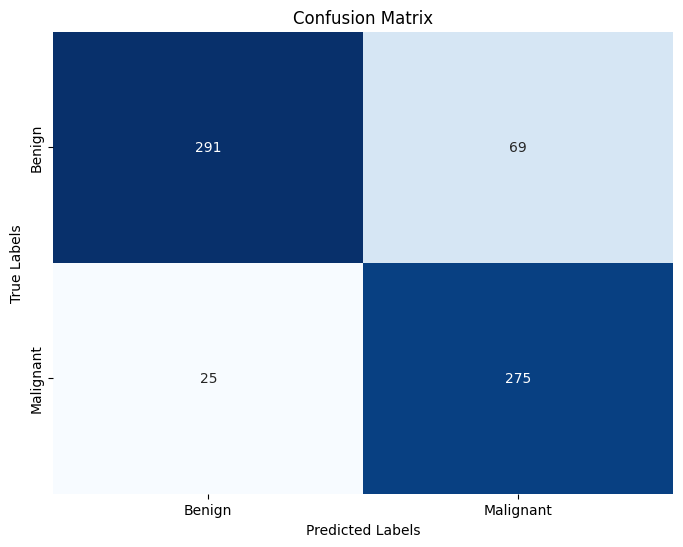

In [58]:
# Predict probabilities on test data
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=-1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test.astype(int), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [59]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       360
           1       0.87      0.88      0.87       300

    accuracy                           0.88       660
   macro avg       0.88      0.88      0.88       660
weighted avg       0.88      0.88      0.88       660

